# Dynamic Investment Blueprint

### Goal: Call a stock market API to target companies of interest while instantly eradicating any companies that do not pass validation boundaries from our initial investment strategy.

### Why? Finding new talent to invest in may be tough and time consuming. By validating companies with real-time updated data provided by a third-party company's API, we can save time and focus fundamental investment strategies. Note: achievement of growth or value investing

### This Project: The project that you will read about here is only an illustration of what we can accomplish with my program. This program may be re-used with any technical parameters of interest and will output an analysis that can be used for projections and straight forward visualization diagrams. In this example we will call the API and validate any companies that fit our 'growth' investing scope (boundaries). Growth investing methods look for smaller companies that have potential for high growth in the future. Although this method is prone to possible loss, if we win there is a much better payout. So lets hundred-fold our investment!

### Part 1 - Data Migration

#### Importing libraries and packages

In [79]:
# Import Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

#### Declare Functions here

##### Function to import a javascript formatted URL into variable

In [80]:
# This code was copied from,
# Credit: https://financialmodelingprep.com/developer/docs/companies-key-stats-free-api/#Python
#!/usr/bin/env python

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

##### Function to convert javascript into a pandas dataframe

In [81]:
def json_to_empty_dataframe(dictionary):
    columns = ['Company']
    # Create a list of the dictionary keys
    for keys in dictionary:
        columns.append(keys)
    
    # Create a dataframe with the columns
    initial_dataframe = pd.DataFrame(columns=columns)
    
    return initial_dataframe

##### Other useful functions

In [135]:
# Function which extracts a big list of companies
def company_list(stock_list):
    # stock_list contains 'symbol', 'name', and 'price'
    final_list = []
    counter = 0
    # Loop through all stock name and append them
    for i in stock_list:
        for key in stock_list[counter]:
            #if key == 'price':
                if (stock_list[counter])['price'] < 0.5:
                    final_list.append((stock_list[counter])['symbol'])
        counter = counter + 1
        
    return final_list

# Function which adds values of the income statement to a stock
def income_statement_dataframe(income_statement):
    # income_statement contains multiple dictionaries with 'financials': 'Company', 'date', 'Revenue Growth', 'EPS'
    final_list = []
    temp = []
    counter = 0
    # Loop through all stock name and append them
    for i in income_statement:
        for key in income_statement[counter]:
            if (key == 'date') or (key == 'Revenue Growth') or (key == 'Gross Profit') or (key == 'EPS'):
                independent = income_statement[counter]
                final_list.append(independent[key])
        temp.append(final_list)
        final_list = []
        counter = counter + 1
    clean_dataframe_income_statement = pd.DataFrame(temp, columns=['Timestamp', 'Revenue Growth', 'Gross Profit', 'EPS'])
        
    return clean_dataframe_income_statement

# Function to match stock price with the dates in the main_dataframe then add the stock price column after match identification
def add_to_dataframe(stock_price, main_dataframe):

    counter = 0
    temp = []
    test = []
    prices = []

    for i in stock_price:
        temp.append((stock_price[counter])['date'])
        temp.append((stock_price[counter])['close'])
        test.append(temp)
        temp = []
        counter = counter + 1


    main_list = (main_dataframe['Timestamp'])

    # My Testing Strategy: (main_list[counter])[0:9] == (test[counter][0])[0:9]
    # If we have a hit, input test[counter][1] into a new list, then break loop and increment counter
    for dates in main_list:
        for loop_through in range(0, len(test)-1):
            if dates[0:9] == (test[loop_through][0])[0:9]:
                prices.append(test[loop_through][1])
                break

    # If information is missing from the API, fill the rest of the column in with 'NA'
    for i in range(0, 41-len(prices)):
        prices.append('NA')

    main_dataframe['Stock Price'] = prices
    return main_dataframe


def add_key_metrics(data_key_metrics, main_dataframe):  
    counter = 0
    temp = []
    key_attributes = []
    free_cash_flow_per_share = []
    pe_ratio = []
    average_payables = []

    #data_key_metrics = stock_price

    for i in data_key_metrics:
        temp.append((data_key_metrics[counter])['date'])
        temp.append((data_key_metrics[counter])['Free Cash Flow per Share'])
        temp.append((data_key_metrics[counter])['PE ratio'])
        temp.append((data_key_metrics[counter])['Average Payables'])
        key_attributes.append(temp)
        temp = []
        counter = counter + 1

    main_list = (main_dataframe['Timestamp'])

    # My Testing Strategy: (main_list[counter])[0:9] == (test[counter][0])[0:9]
    # If we have a hit, input test[counter][1] into a new list, then break loop and increment counter
    for dates in main_list:
        for loop_through in range(0, len(key_attributes)-1):
            if dates[0:9] == (key_attributes[loop_through][0])[0:9]:
                free_cash_flow_per_share.append(key_attributes[loop_through][1])
                pe_ratio.append(key_attributes[loop_through][2])
                average_payables.append(key_attributes[loop_through][3])
                break

    # If information is missing from the API, fill the rest of the column in with 'NA'
    for i in range(0, 41-len(free_cash_flow_per_share)):
        free_cash_flow_per_share.append('NA')

        # If information is missing from the API, fill the rest of the column in with 'NA'
    for i in range(0, 41-len(pe_ratio)):
        pe_ratio.append('NA')

    # If information is missing from the API, fill the rest of the column in with 'NA'
    for i in range(0, 41-len(average_payables)):
        average_payables.append('NA')

    main_dataframe['Free Cash Flow per Share'] = free_cash_flow_per_share
    main_dataframe['P/E Ratio'] = pe_ratio
    main_dataframe['Average Payables'] = average_payables
    
    return main_dataframe


# Functions to input the stock symbol into the url so we can call the API
def name_API_company_profile(symbol, url):
    return url[:54] + symbol + url[54:]

def name_API_income_statement(symbol, url):
    return url[:69] + symbol + url[69:]

def name_API_stock_price(symbol, url):
    return url[:63] + symbol + url[63:]

def name_API_key_metrics(symbol, url):
    return url[:61] + symbol + url[61:]
##########################################################################

##### Call API from resource: financialmodelingprep.com

#### (CURRENTLY NOT USING) * Get a ticker list of all companies in the stock market

In [136]:
# Import companies from API
url_stocks = ("https://financialmodelingprep.com/api/v3/company/stock/list")
stock_list = get_jsonparsed_data(url_stocks)

hierarchy = stock_list["symbolsList"]
# Convert json data into a list of all stocks
all_stocks = company_list(hierarchy)

#### NOT USING * Create an empty dataframe with relevant columns of multiple stocks

In [137]:
# Identify our data identifiers
ticker = "AMD"

# Add ticker symbol into data URL - this creates an accessible source for the API extraction process
url_company_profile = ("https://financialmodelingprep.com/api/company/profile/?datatype=json") # Insert ticker at 54

# Add ticker symbol into data URL - this extracts data from the website reference
api_call = name_API_company_profile(ticker, url_company_profile)

# Take the website data from json into a pandas dataframe
js = get_jsonparsed_data(api_call)
stock_data = js[ticker]

test = json_to_empty_dataframe(stock_data)

#### (1) Create a dataframe from 'Income Statement' data as the basis of our dataframe

In [138]:
# Identify our data identifiers
ticker = "AMD"

# Add ticker symbol into data URL - this creates an accessible source for the API extraction process
url_income_statement = ("https://financialmodelingprep.com/api/v3/financials/income-statement/?period=quarter") # Insert ticker at 69 ;)

# Add ticker symbol into data URL - this extracts data from the website reference
api_call = name_API_income_statement(ticker, url_income_statement)

# Take the website data from json into a pandas dataframe
income_statement = get_jsonparsed_data(api_call)
data_income_statement = income_statement["financials"]

# Create empty pandas dataframe
dataframe_income_statement = json_to_empty_dataframe(data_income_statement[0])

# Delete All unecessary columns from pandas dataframe
#clean_dataframe_income_statement = dataframe_income_statement.drop(columns=[ 'Company', 'Revenue', 'Cost of Revenue', 'R&D Expenses', 'SG&A Expense',
#                                                                            'Operating Expenses', 'Operating Income', 'Interest Expense', 'Earnings before Tax', 
#                                                                            'Income Tax Expense', 'Net Income - Non-Controlling int', 'Net Income - Discontinued ops', 
#                                                                            'Net Income', 'Preferred Dividends', 'Net Income Com', 'EPS Diluted', 'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)',
#                                                                            'Dividend per Share', 'Gross Margin', 'EBITDA Margin', 'EBIT Margin', 'Profit Margin', 'Free Cash Flow margin',
#                                                                            'EBITDA', 'EBIT', 'Consolidated Income', 'Earnings Before Tax Margin', 'Net Profit Margin'])

# Append attributes to main dataframe
main_dataframe = income_statement_dataframe(data_income_statement)

#### (2) Add 'Historical Price' data to the main_dataframe for Stock Price

In [139]:
# Get API url for historical stock price
url_stock_price = ("https://financialmodelingprep.com/api/v3/historical-price-full/?serietype=line") # Insert ticker at 63

# Add ticker symbol into data URL - this creates an accessible source for the API extraction process
api_call = name_API_stock_price(ticker, url_stock_price)

# Take the website data from json into a pandas dataframe
stock_price = get_jsonparsed_data(api_call)
data_stock_price = stock_price["historical"]

# Reverse list to match descending order of main_dataframe
data_stock_price.reverse()

# Add stock prices relevant to date into the main_dataframe
main_dataframe = add_to_dataframe(data_stock_price, main_dataframe)

#### (3) Add 'Company Key Metrics' data to the main_dataframe (ie. 'PE ratio', 'Market Cap', 'Free Cash Flow per Share', etc)

In [ ]:
# Get API url for Company Key Metrics data
url_key_metrics = ("https://financialmodelingprep.com/api/v3/company-key-metrics/?period=quarter")# Insert ticker at 61

# Add ticker symbol into data URL - this creates an accessible source for the API extraction process
api_call = name_API_key_metrics(ticker, url_key_metrics)

# Create a list of dictionaries of all data from imported json data
key_metrics = get_jsonparsed_data(api_call)
data_key_metrics = key_metrics["metrics"]

# Add any relevant attributes we want into the dataframe
main_dataframe = add_key_metrics(data_key_metrics, main_dataframe)

In [ ]:
print("The Data Requested for: " + ticker)
main_dataframe

### Part 2 - Indicator Calculations

### Part 3 - Margin of Safety Calculation

### Part 4 - Data Visualization

['2019', '2019', '2018', '2018', '2018', '2018', '2017', '2017', '2017', '2017', '2016', '2016', '2016', '2016', '2015', '2015', '2015', '2015', '2014', '2014', '2014', '2014', '2013', '2013', '2013', '2013', '2012', '2012', '2012', '2012', '2011', '2011', '2011', '2011', '2010', '2010', '2010', '2010', '2009', '2009']


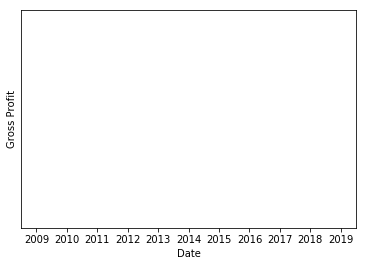

0     2019-06-29
1     2019-03-30
2     2018-12-29
3     2018-09-29
4     2018-06-30
5     2018-03-31
6     2017-12-30
7     2017-09-30
8     2017-07-01
9     2017-04-01
10    2016-12-31
11    2016-09-24
12    2016-06-25
13    2016-03-26
14    2015-12-26
15    2015-09-26
16    2015-06-27
17    2015-03-28
18    2014-12-27
19    2014-09-27
20    2014-06-28
21    2014-03-29
22    2013-12-28
23    2013-09-28
24    2013-06-29
25    2013-03-30
26    2012-12-29
27    2012-09-29
28    2012-06-30
29    2012-03-31
30    2011-12-31
31    2011-10-01
32    2011-07-02
33    2011-04-02
34    2010-12-25
35    2010-09-25
36    2010-06-26
37    2010-03-27
38    2009-12-26
39    2009-09-26
Name: Timestamp, dtype: object

In [122]:
# PLOTTING...
x = (main_dataframe['Timestamp'])[:40]
y = (main_dataframe['Gross Profit'])[:40]

by_year = []
for i in x:
    by_year.append(i[0:4])
    
print(by_year)

# Graph date vs EPS plot
plt.gca().invert_xaxis()
plt.ylim((441000000, 10000000))
plt.scatter(by_year, y)
plt.ylabel('Gross Profit')
plt.xlabel('Date')
plt.show()

x
